<a href="https://colab.research.google.com/github/bkabhilash0/ASE-Project/blob/master/Pollution_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

## About Dataset

Dataset Source - [Global Pollution Dataset](https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset)

### Context
Air Pollution is contamination of the indoor or outdoor environment by any chemical, physical or biological agent that modifies the natural characteristics of the atmosphere. Household combustion devices, motor vehicles, industrial facilities and forest fires are common sources of air pollution. Pollutants of major public health concern include particulate matter, carbon monoxide, ozone, nitrogen dioxide and sulfur dioxide. Outdoor and indoor air pollution cause respiratory and other diseases and are important sources of morbidity and mortality.

This dataset provides geolocated information about the following pollutants:

- Nitrogen Dioxide [NO2] : Nitrogen Dioxide is one of the several nitrogen oxides. It is introduced into the air by natural phenomena like entry from stratosphere or lighting. At the surface level, however, NO2 forms from cars, trucks and buses emissions, power plants and off-road equipment. Exposure over short periods can aggravate respiratory diseases, like asthma. Longer exposures may contribute to develoment of asthma and respiratory infections. People with asthma, children and the elderly are at greater risk for the health effects of NO2.

- Ozone [O3] : The Ozone molecule is harmful for outdoor air quality (if outside of the ozone layer). At surface level, ozone is created by chemical reactions between oxides of nitrogen and volatile organic compounds (VOC). Differently from the good ozone located in the upper atmosphere, ground level ozone can provoke several health problems like chest pain, coughing, throat irritation and airway inflammation. Furthermore it can reduce lung function and worsen bronchitis, emphysema, and asthma. Ozone affects also vegetation and ecosystems. In particular, it damages sensitive vegetation during the growing season.

- Carbon Monoxide [CO] : Carbon Monoxide is a colorless and odorless gas. Outdoor, it is emitted in the air above all by cars, trucks and other vehicles or machineries that burn fossil fuels. Such items like kerosene and gas space heaters, gas stoves also release CO affecting indoor air quality. Breathing air with a high concentration of CO reduces the amount of oxygen that can be transported in the blood stream to critical organs like the heart and brain. At very high levels, which are not likely to occur outdoor but which are possible in enclosed environments. CO can cause dizziness, confusion, unconsciousness and death.

- Particulate Matter [PM2.5] : Atmospheric Particulate Matter, also known as atmospheric aerosol particles, are complex mixtures of small solid and liquid matter that get into the air. If inhaled they can cause serious heart and lungs problem. They have been classified as group 1 carcinogen by the International Agengy for Research on Cancer (IARC). PM10 refers to those particules with a diameter of 10 micrometers or less. PM2.5 refers to those particles with a diameter of 2.5 micrometers or less.

### Content
1. Country : Name of the country
2. City : Name of the city
3. AQI Value : Overall AQI value of the city
4. AQI Category : Overall AQI category of the city
5. CO AQI Value : AQI value of Carbon Monoxide of the city
6. CO AQI Category : AQI category of Carbon Monoxide of the city
7. Ozone AQI Value : AQI value of Ozone of the city
8. Ozone AQI Category : AQI category of Ozone of the city
9. NO2 AQI Value : AQI value of Nitrogen Dioxide of the city
10. NO2 AQI Category : AQI category of Nitrogen Dioxide of the city
11. PM2.5 AQI Value : AQI value of Particulate Matter with a diameter of 2.5 micrometers or less of the city
12. PM2.5 AQI Category : AQI category of Particulate Matter with a diameter of 2.5 micrometers or less of the city

In [2]:
data = pd.read_csv("./global_air_pollution_dataset.csv")

In [3]:
data.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [5]:
data.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [6]:
uc = data['Country'].unique()
countries = pd.DataFrame(uc,columns=['Country'])
countries


,Country
0,Russian Federation
1,Brazil
2,Italy
3,Poland
4,France
...,...
171,Bahrain
172,Seychelles
173,State of Palestine
174,Saint Kitts and Nevis


In [7]:
num_of_states_per_country = data.groupby(['Country'])['City'].count()

In [8]:
num_of_states_per_country = num_of_states_per_country.to_frame().reset_index()

In [9]:
num_of_states_per_country

,Country,City
0,Afghanistan,49
1,Albania,32
2,Algeria,12
3,Andorra,3
4,Angola,27
...,...,...
170,Venezuela (Bolivarian Republic of),90
171,Viet Nam,60
172,Yemen,7
173,Zambia,42


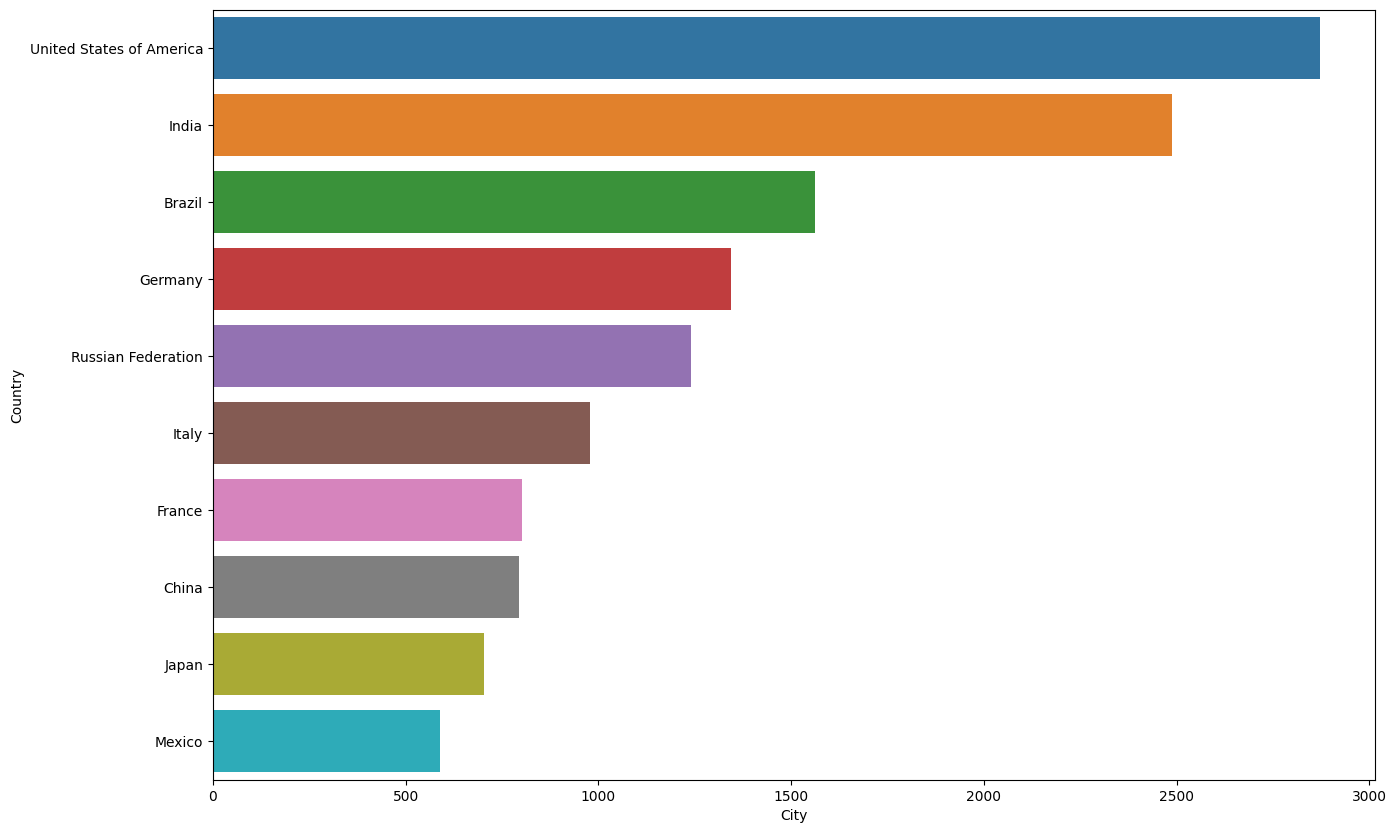

In [10]:
plt.figure(figsize=(15,10))
top_10_countries = num_of_states_per_country.sort_values(by="City",ascending=False)[:10]
sns.barplot(data=top_10_countries,y="Country",x="City")
plt.show()

In [11]:
data.isna().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [12]:
def showMissingStats():
    missing = data.isnull().sum()
    missing.index
    missing_data = {
        'Country':[],
        'Count':[],
        '% Missing':[]
    }
    for m in missing.index:
        missing_data['Count'] = missing_data['Count'] + [missing[m]]
        missing_data['Country'] = missing_data['Country']+[m] 
        missing_data['% Missing'] =missing_data['% Missing']+[(missing[m]/len(data)) * 100]
    missing_df = pd.DataFrame(missing_data)
    return missing_df

In [13]:
showMissingStats()

,Country,Count,% Missing
0,Country,427,1.819887
1,City,1,0.004262
2,AQI Value,0,0.000000
3,AQI Category,0,0.000000
4,CO AQI Value,0,0.000000
5,CO AQI Category,0,0.000000
6,Ozone AQI Value,0,0.000000
7,Ozone AQI Category,0,0.000000
8,NO2 AQI Value,0,0.000000
9,NO2 AQI Category,0,0.000000


In [14]:
print(len(data))

23463


In [15]:
# Cities without a Country Value

print(data[data['Country'].isnull()]['City'].unique()[:10])

['Granville' 'Kingston Upon Hull' 'New Waterford' 'Kingstown' 'Nanakuli'
 'Lavagna' 'Ladispoli' 'Dong Hoi' 'Nettuno' 'Puebloviejo']


In [16]:
# Drop rows with Missing Values
data_wo_miss_vals = data.dropna().copy()

In [17]:
data_wo_miss_vals

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [18]:
top_10_countries = data_wo_miss_vals.groupby('Country')['City'].count().to_frame().reset_index().sort_values(by="City",ascending=True)[-10:]
count_plot = px.bar(data_frame=top_10_countries,y="Country",x="City",title="Top 10 Countries with More Cities in the Data",height=600,width=800)
count_plot.show()

In [19]:
px.bar(data_wo_miss_vals.groupby("Country")['AQI Value'].mean().sort_values()[:10],
       y=data_wo_miss_vals.groupby("Country")['AQI Value'].mean().sort_values()[:10].index,
      x="AQI Value",labels={
          'y':'Country',
          'AQI Value':'Average AQI Value'
      },
    title="Country vs Average AQI(Top 10)",
    width=900).update_traces(marker_color='red').show()

In [20]:
top_10 = data_wo_miss_vals.groupby(['Country']).count().sort_values(by="City",ascending=False).reset_index()['Country'][:10]

t = data_wo_miss_vals[data_wo_miss_vals['Country'].isin(top_10)]

In [21]:
t

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...
23456,United States of America,Highland Springs,54,Moderate,1,Good,34,Good,5,Good,54,Moderate
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good


In [22]:
tmp = t.groupby(['Country','AQI Category']).size().reset_index().rename(columns={0:'Count'})

fig = px.bar(tmp,x='Country',y='Count',color="AQI Category",height=600,width=1000,title="Country w.r.t AQI Category(Top 10)")
# fig.update_layout(font_size=14)
fig.show()
# plt.figure(figsize=(15,20))
# sns.barplot(data=t,y='Country',x='AQI Value',hue="AQI Category")
# plt.show()

In [23]:
# Make a list of countries.
top_list = (data_wo_miss_vals.groupby('Country')
               # Count the rows: any column without missing values
               ['AQI Category'].count()
               # Sort values.
               .sort_values(ascending=False)
               .head(15)
               .index
               .to_list())

In [24]:
top_list

['United States of America',
 'India',
 'Brazil',
 'Germany',
 'Russian Federation',
 'Italy',
 'France',
 'China',
 'Japan',
 'Mexico',
 'Spain',
 'United Kingdom of Great Britain and Northern Ireland',
 'Poland',
 'Indonesia',
 'Philippines']

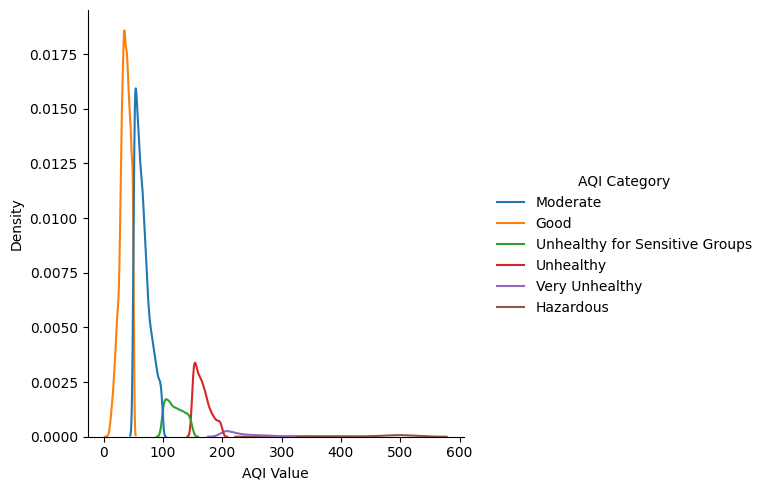

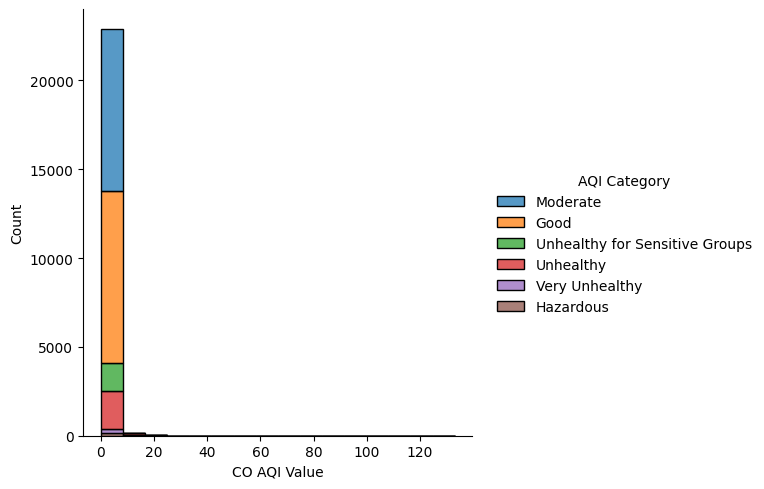

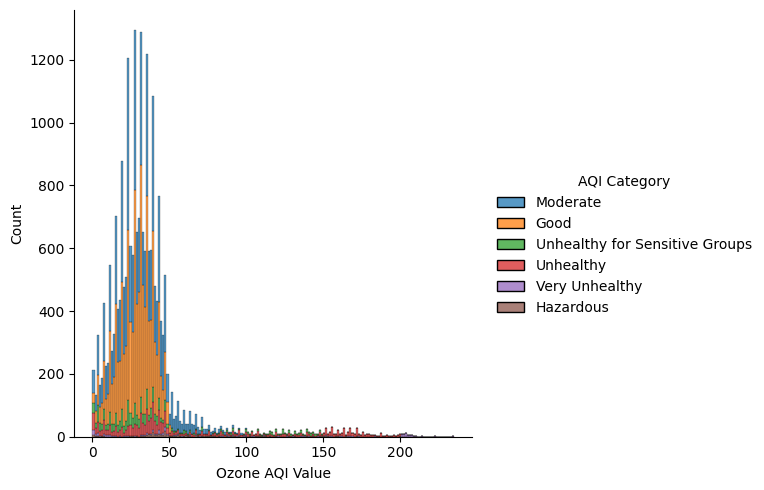

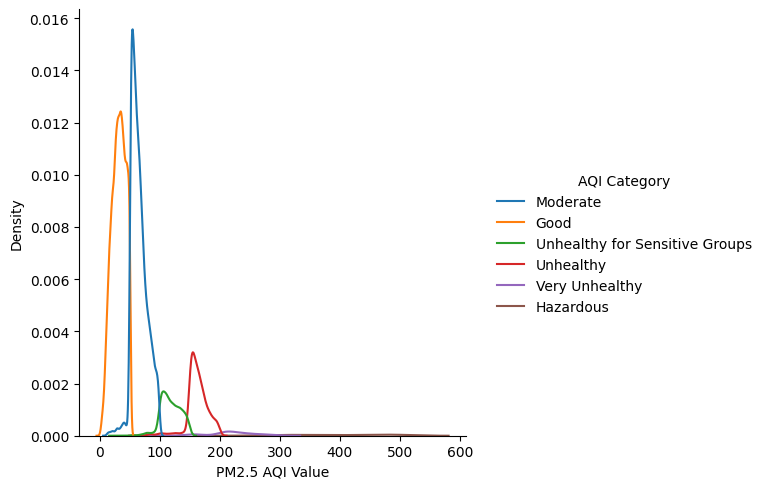

<Figure size 1400x600 with 0 Axes>

In [25]:
sns.displot(data=data_wo_miss_vals,x='AQI Value', hue='AQI Category',kind='kde')

sns.displot(data=data_wo_miss_vals,x='CO AQI Value',hue='AQI Category',multiple='stack')

sns.displot(data=data_wo_miss_vals,x='Ozone AQI Value',hue='AQI Category',multiple='stack')

sns.displot(data=data_wo_miss_vals,x='PM2.5 AQI Value',hue='AQI Category',kind='kde')

plt.figure(figsize=(14,6))

plt.show()

<ipython-input-26-7e9de64ffbbd>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



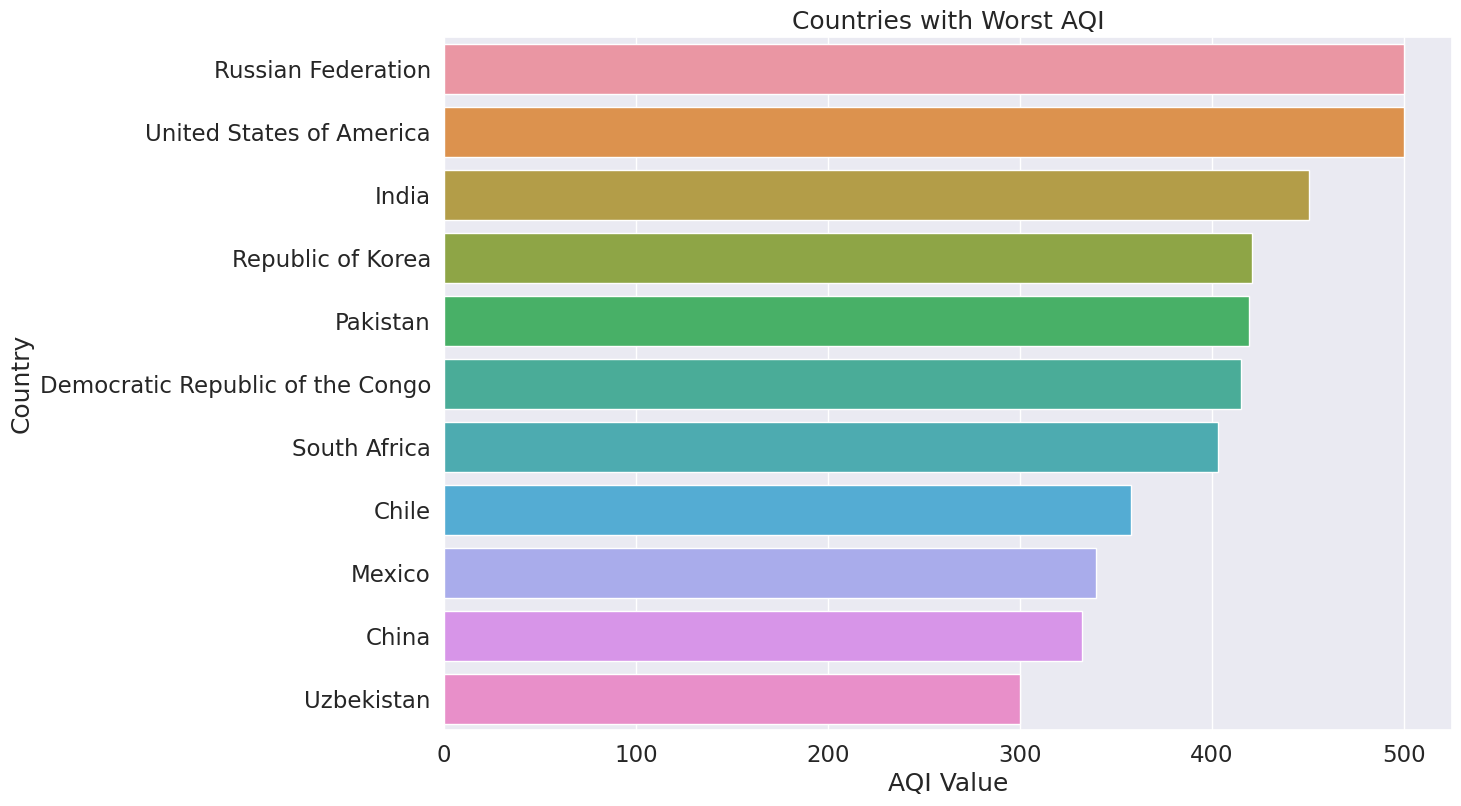

In [26]:
aql_overall = data_wo_miss_vals[['Country','City','AQI Value','AQI Category']]
aql_overall_haz = aql_overall[aql_overall['AQI Category'] == 'Hazardous']


hazardous = aql_overall_haz.groupby('Country',as_index=False).mean().sort_values(by="AQI Value",ascending=False)
sns.set(font_scale=1.5)
plt.figure(figsize=(13,9))
sns.barplot(data=hazardous,x="AQI Value",y="Country",).set(title="Countries with Worst AQI")
plt.show()

<ipython-input-27-a012c6518849>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



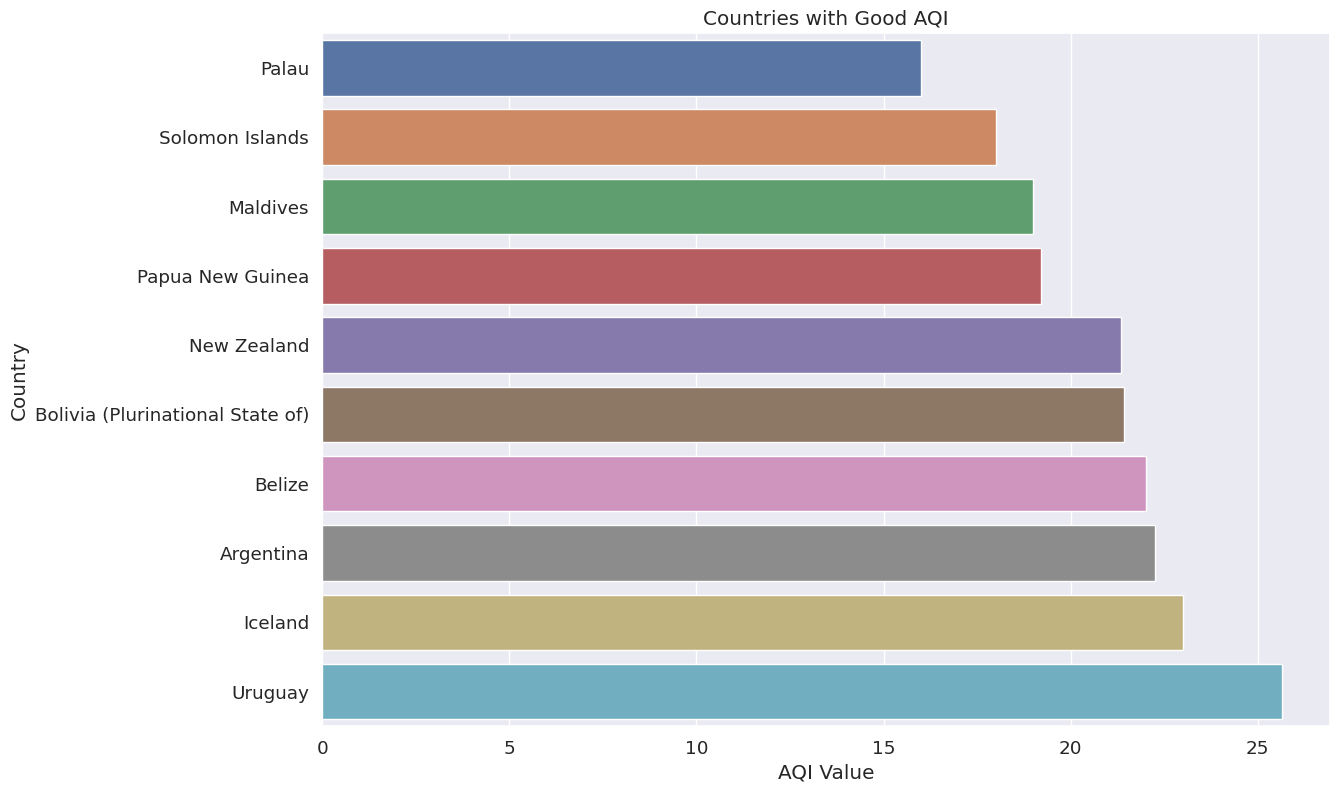

In [27]:
aql_overall_haz = aql_overall[aql_overall['AQI Category'] == 'Good']


good = aql_overall_haz.groupby('Country',as_index=False).mean().sort_values(by="AQI Value",ascending=True).head(10)
sns.set(font_scale=1.2)
plt.figure(figsize=(13,9))
sns.barplot(data=good,x="AQI Value",y="Country",).set(title="Countries with Good AQI")
plt.show()

In [28]:
data_wo_miss_vals.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [29]:
px.scatter(data_frame=data_wo_miss_vals,x="AQI Value",y="Ozone AQI Value",color="AQI Category",width=1000,height=600,title="AQI vs Ozone AQI")

In [30]:
# sns.set(font_scale=1.2)

# plt.figure(figsize=(13,7))

# ax = sns.scatterplot(data=data_wo_miss_vals,x="AQI Value",y="Ozone AQI Value",hue="AQI Category")
# ax.set(title="AQI vs Ozone AQI")
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

<ipython-input-31-ce20317e6b6e>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



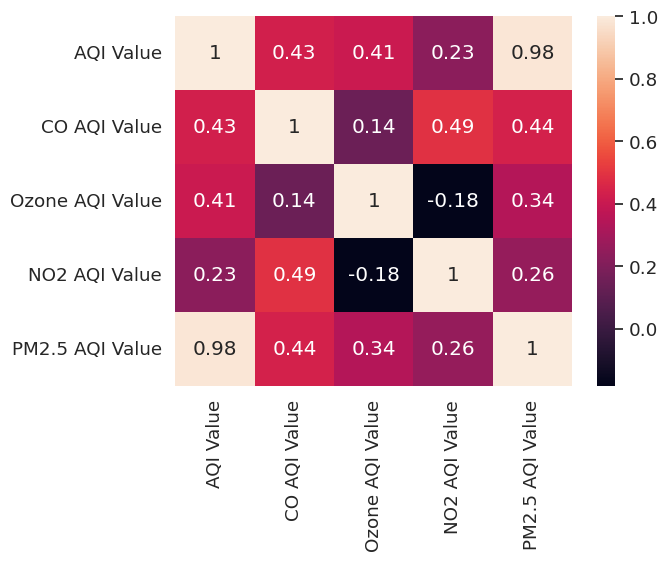

In [31]:
sns.heatmap(data_wo_miss_vals.corr(),annot=True)
plt.show()

<Figure size 1000x700 with 0 Axes>

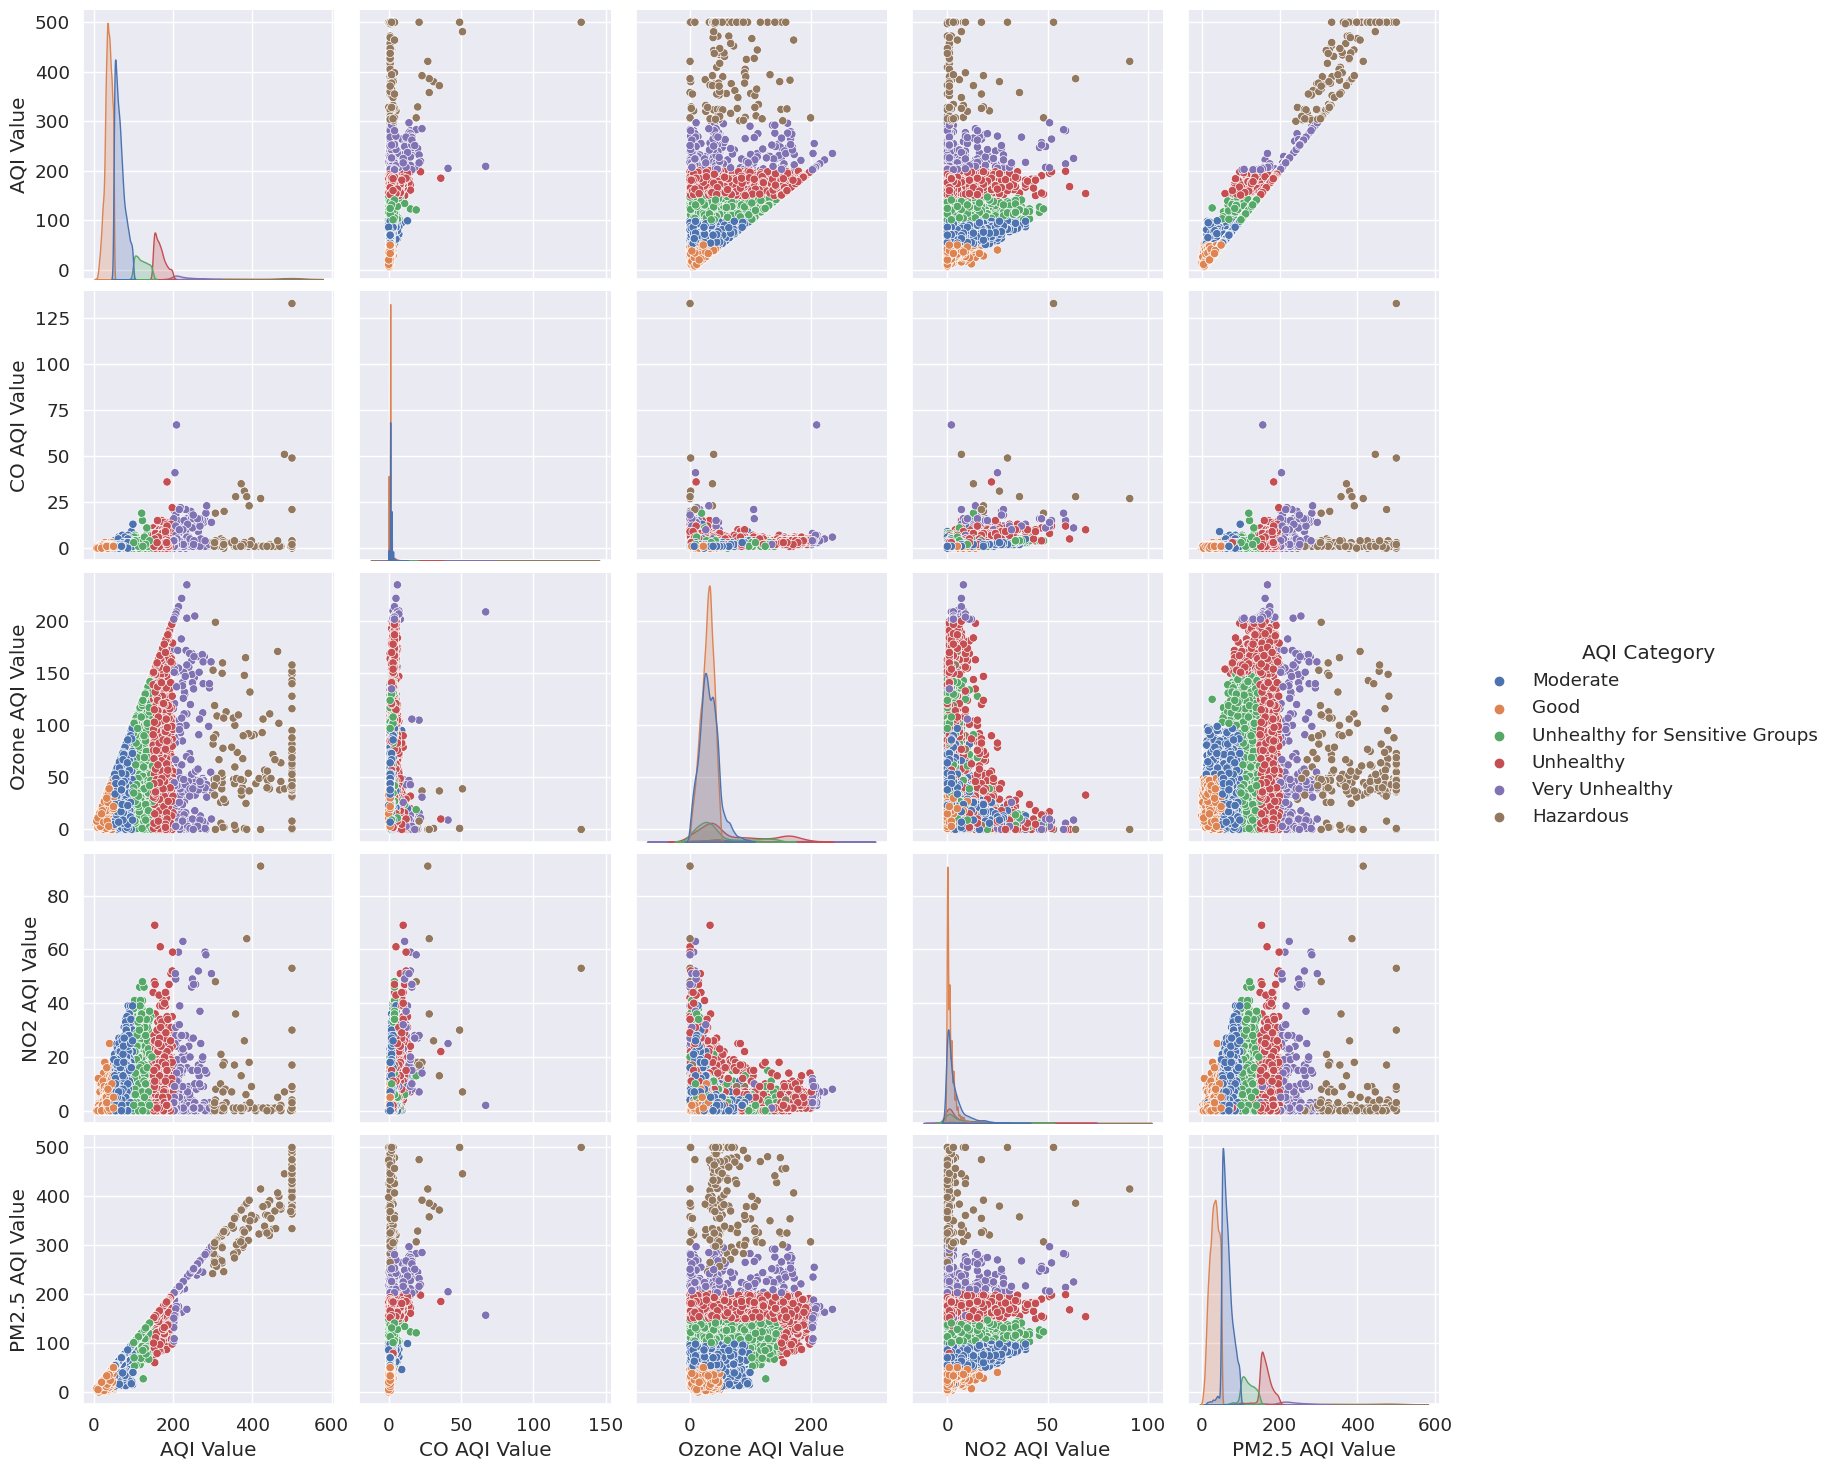

In [32]:

num_columns = data_wo_miss_vals.select_dtypes('number')
num_columns['AQI Category'] = data_wo_miss_vals['AQI Category']

plt.figure(figsize=(10,7))
sns.pairplot(num_columns,hue="AQI Category",height=3)
plt.show()

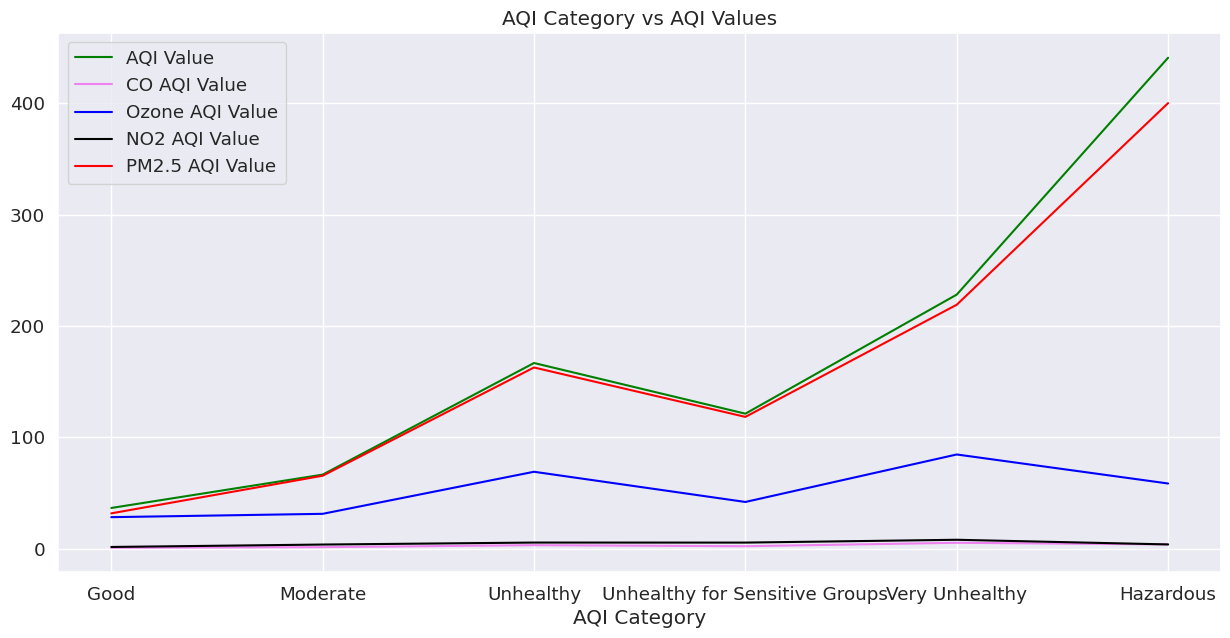

In [33]:
num_columns_2 = data_wo_miss_vals.select_dtypes('number')
num_columns_2['AQI Category'] = data_wo_miss_vals['AQI Category']

order = ['Good', 'Moderate', 'Unhealthy',
       'Unhealthy for Sensitive Groups', 'Very Unhealthy','Hazardous']

num_columns_2.groupby('AQI Category').mean().loc[order].plot(color=['Green','violet','blue','black','red'],figsize=(15,7),title="AQI Category vs AQI Values")
plt.show()